# Regressão Linear Simples

A Regressão Linear Simples é uma técnica estatística utilizada para entender a relação entre duas variáveis quantitativas. <br> Basicamente, ela permite prever o valor de uma variável dependente $(Y)$ com base no valor de uma variável independente $(X)$. A equação da regressão linear simples é:

$𝑌=𝑏_{0}+𝑏_{1}𝑋+𝜖$

onde:

* $𝑌$ → variável dependente
* $𝑋$ → variável independente
* $𝑏_{0}$ → intercepto
* $𝑏_{1}$ → coeficiente de inclinação
* $𝜖$ → termo de erro

**Importar Bibliotecas Necessárias**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#from yellowbrick.regressor import ResidualsPlot #Warning


**Carregar e Preparar os Dados**

In [87]:
# Gerando um dataset de exemplo
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # variável independente
Y = 2.5 * X + np.random.randn(100, 1) * 5  # variável dependente com ruído

# Convertendo para DataFrame do pandas
dados = pd.DataFrame(data={'X': X.flatten(), 'Y': Y.flatten()})
print(dados.head())

          X          Y
0  5.488135   7.894588
1  7.151894  22.383867
2  6.027634  17.397397
3  5.448832   5.940861
4  4.236548  18.032631


**Dividir os Dados em Conjuntos de Treinamento e Teste**

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


**Treinar o Modelo de Regressão Linear**

In [89]:
# Criando o modelo de regressão linear
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, Y_train)

LinearRegression()

**Fazer Previsões**

In [90]:
# Fazendo previsões
Y_pred = modelo.predict(X_test)


**Avaliar o Modelo**

Calcular métricas de desempenho como o erro quadrático médio (MSE) e o coeficiente de determinação (R²).

In [91]:
# Avaliando o modelo
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


Erro Quadrático Médio (MSE): 26.085834539237936
Coeficiente de Determinação (R²): 0.6607658091947084


**Visualizar os Resultados**

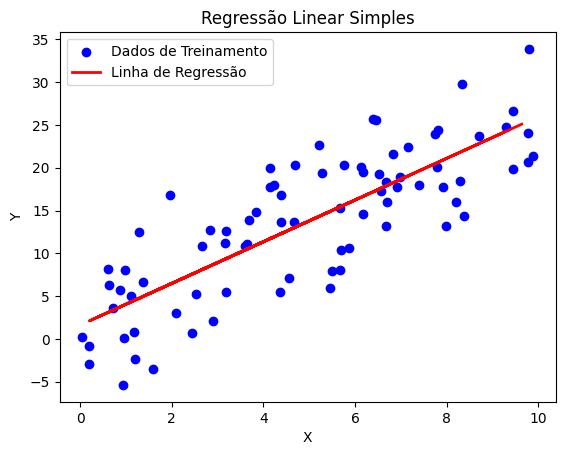

In [92]:
# Plotando os dados de treinamento e a linha de regressão
plt.scatter(X_train, Y_train, color='blue', label='Dados de Treinamento')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regressão Linear Simples')
plt.show()


**↑ Interpretação dos Resultados**
Coeficiente $𝑏_{0}$ (Intercepto): Representa o valor esperado de $𝑌$ quando $𝑋=0$

Coeficiente $𝑏_{1}$ (Inclinação): Representa a mudança esperada em $𝑌$ para um aumento unitário em $𝑋$

Erro Quadrático Médio (MSE): Mede a média dos quadrados dos erros ou desvios (diferença entre os valores previstos e observados), isto é, valores menores indicam melhor ajuste.

Coeficiente de Determinação ($R²$): Indica a proporção da variância em $𝑌$ que pode ser explicada por $𝑋$. Varia de 0 a 1, onde valores mais próximos de 1 indicam melhor ajuste.

**Visualizar os Residuais**

Verificar se os resíduos estão aleatoriamente distribuídos (o que sugere um bom ajuste do modelo).

Detectar padrões nos resíduos, o que pode indicar problemas como a falta de linearidade ou heterocedasticidade.

Identificar outliers que podem influenciar negativamente o modelo.

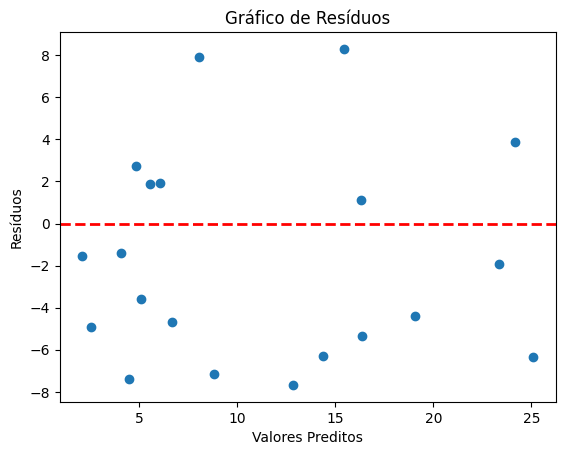

In [93]:
# Calculando os resíduos 
residuos = Y_test - Y_pred 

# Plotando os resíduos 
plt.scatter(Y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos') 
plt.show()

**Explicação do Gráfico de Resíduos**
* **Valores Preditos (X-Axis):** Estes são os valores previstos pelo modelo de regressão.
* **Resíduos (Y-Axis):** Estes são as diferenças entre os valores observados e os valores previstos.
* **Linha Horizontal Vermelha:** Representa a linha onde o resíduo é zero. Idealmente, os resíduos devem estar aleatoriamente distribuídos ao redor desta linha, sem mostrar um padrão claro.

**Interpretação dos Resíduos**
* **Distribuição Aleatória:** Se os resíduos estão aleatoriamente distribuídos ao redor da linha zero, isso sugere que o modelo é apropriado.
* **Padrões ou Curvas:** Se você notar um padrão ou curva nos resíduos, isso pode indicar que o modelo não está capturando bem a relação entre as variáveis.
* **Heterocedasticidade:** Se a variabilidade dos resíduos aumenta ou diminui com os valores preditos, pode haver heterocedasticidade, que viola uma das suposições da regressão linear.

#### ❇️ Exemplo:

In [94]:
base = pd.read_csv('cars.csv')
print(base.shape,"\n")
print(base.head())

(50, 3) 

   Unnamed: 0  speed  dist
0           1      4     2
1           2      4    10
2           3      7     4
3           4      7    22
4           5      8    16


O desafio é: descobrir a velocidade a partir da distância de frenagem de um carro

In [95]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


⚠️ Eixo X (horizontal →) é a variável independente, isto é, a variável explanatória, ou seja, na Regressão Linear, é o que se usa para prever

⚠️ Eixo Y (vertical ↑) é a variável dependente, isto é, a variável de resposta, ou seja, na Regressão Linear, é o que se quer prever

Definir das variáveis X e Y, onde:
* X = Distância → variável independente (base para prever)
* Y = Velocidade → variável depentende (o que será previsto)

In [96]:
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values

print(X, "\n\n", y)

[  2  10   4  22  16  10  18  26  34  17  28  14  20  24  28  26  34  34
  46  26  36  60  80  20  26  54  32  40  32  40  50  42  56  76  84  36
  46  68  32  48  52  56  64  66  54  70  92  93 120  85] 

 [ 4  4  7  7  8  9 10 10 10 11 11 12 12 12 12 13 13 13 13 14 14 14 14 15
 15 15 16 16 17 17 17 18 18 18 18 19 19 19 20 20 20 20 20 22 23 24 24 24
 24 25]


Aplicar a correlação:

In [97]:
correlacao = np.corrcoef(X, y)
correlacao #(X,X; X,y; y,X; y,y) ↓

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

Transpor a lista X (da distância) para uma coluna:

In [98]:
# Formato de matriz com mais de uma colula
X = X.reshape(-1, 1)
X

array([[  2],
       [ 10],
       [  4],
       [ 22],
       [ 16],
       [ 10],
       [ 18],
       [ 26],
       [ 34],
       [ 17],
       [ 28],
       [ 14],
       [ 20],
       [ 24],
       [ 28],
       [ 26],
       [ 34],
       [ 34],
       [ 46],
       [ 26],
       [ 36],
       [ 60],
       [ 80],
       [ 20],
       [ 26],
       [ 54],
       [ 32],
       [ 40],
       [ 32],
       [ 40],
       [ 50],
       [ 42],
       [ 56],
       [ 76],
       [ 84],
       [ 36],
       [ 46],
       [ 68],
       [ 32],
       [ 48],
       [ 52],
       [ 56],
       [ 64],
       [ 66],
       [ 54],
       [ 70],
       [ 92],
       [ 93],
       [120],
       [ 85]])

Inserir a função dentro de uma variável modelo:

In [99]:
modelo = LinearRegression()
modelo.fit(X, y)

modelo

LinearRegression()

Onde a linha de melhor ajuste toca o eixo Y (vertical):

In [100]:
modelo.intercept_ 

np.float64(8.283905641787172)

Inclinação é o quanto a variável cresce (ângulo):

In [101]:
modelo.coef_ 

array([0.16556757])

Plotagem visual do modelo:

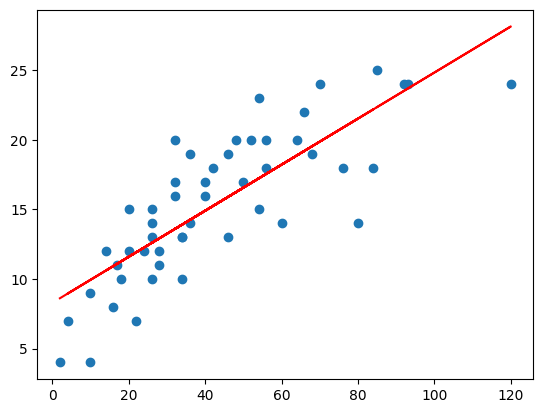

In [102]:
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

##### Previsões:

Previsão manual:

In [ ]:
prever = float(input("Insira a distância em pés:"))
prever

22.0

In [ ]:
# Previsão da "distância de 22 pés" usando a fórmula manual:
## interceptação + inclinação * valor de distância

modelo.intercept_ + modelo.coef_ * prever

array([11.92639228])

Previsão automática:

In [ ]:
# Previsão da "distância de 22 pés" usando a fórmula Sci Kit Learn:
## interceptação + inclinação * valor de distância

modelo.predict([[prever]])

array([11.92639228])

In [ ]:
'''# Gráfico para visualizar os resudiais [⚠️ NÃO ESTÁ FUNCIONANDO]
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()'''

'# Gráfico para visualizar os resudiais [⚠️ NÃO ESTÁ FUNCIONANDO]\nvisualizador = ResidualsPlot(modelo)\nvisualizador.fit(X, y)\nvisualizador.poof()'

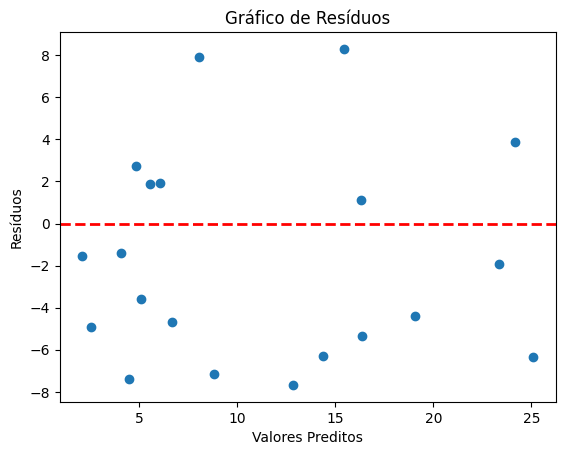

In [ ]:
# Calculando os resíduos 
residuos = Y_test - Y_pred 

# Plotando os resíduos 
plt.scatter(Y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos') 
plt.show()